In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "./Dados de Vibração e Temperatura/"
lista_arquivos = os.listdir(path)

In [4]:
dados = pd.DataFrame([["","","",""]], columns = ["acc X","acc Y", "acc Z", "Temperatura"])

In [5]:
for i in lista_arquivos:
    arquivo = pd.read_csv(path+i, header=None, names = ["acc X","acc Y", "acc Z", "Temperatura"])
    dados = pd.concat((dados,arquivo), axis=0)

In [6]:
dados.drop(0, inplace=True)
dados

,acc X,acc Y,acc Z,Temperatura
1,-8.81,1.4,-0.49,38.55
2,-8.91,0.72,-1.68,38.65
3,-9.59,-0.79,-2.61,38.6
4,-9.85,-1.53,-2.27,38.6
5,-9.5,-0.53,-0.77,38.6
...,...,...,...,...
12758,-9.22,0.2,-0.38,47.4
12759,-9.04,1.58,0.35,47.49
12760,-8.96,0.96,-0.77,47.45
12761,-9.53,-0.51,-2.03,47.54


Ponto 1) Fazer a Análise Espectral do equipamento e identificar padrões entre coletas:

a) Fast Fourier transform (FFT)

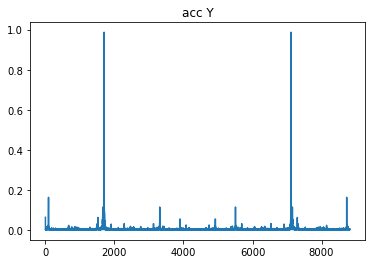

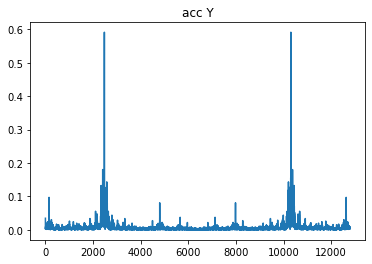

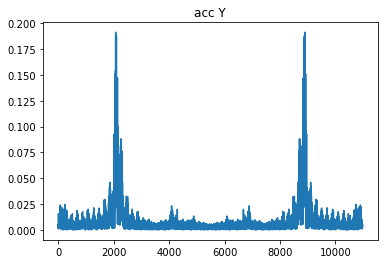

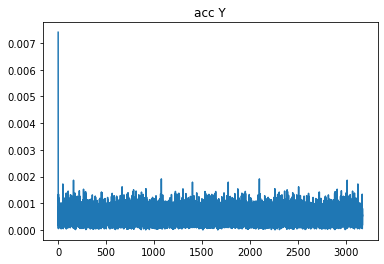

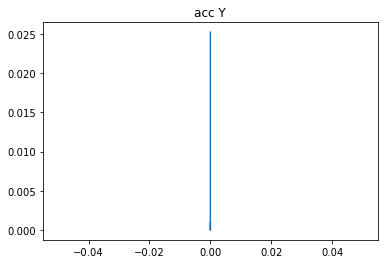

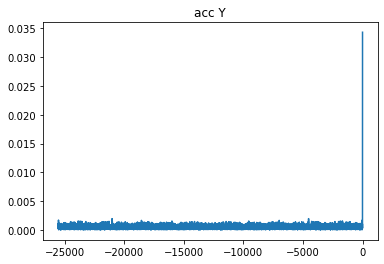

C:\Users\vitor\AppData\Local\Temp/ipykernel_3220/182566969.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  T = arquivo["acc Y"].iloc[0]/arquivo["acc Y"].iloc[1]
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


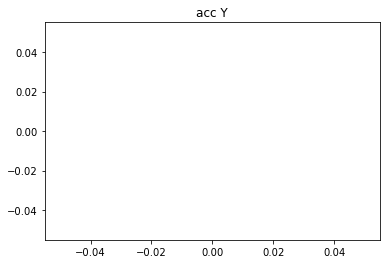

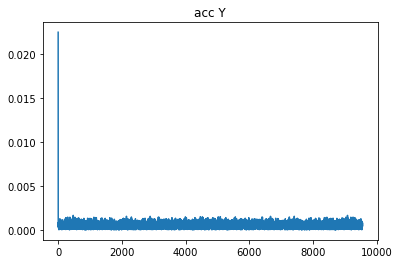

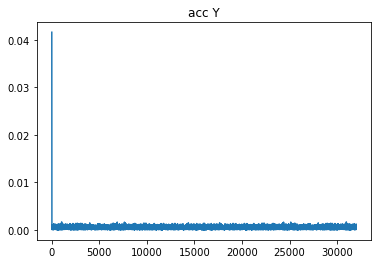

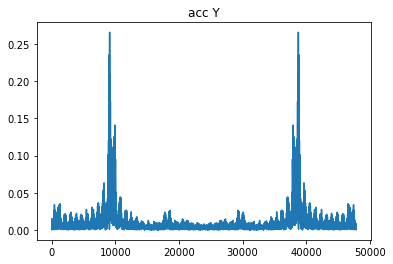

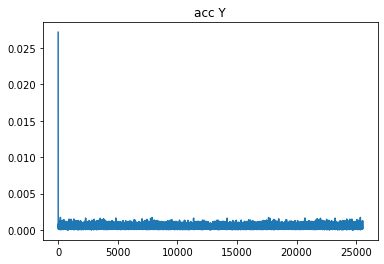

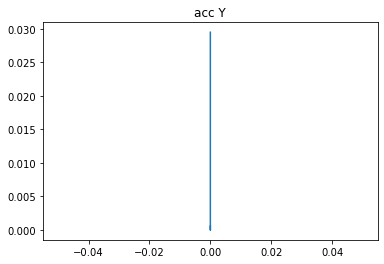

C:\Users\vitor\AppData\Local\Temp/ipykernel_3220/182566969.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  T = arquivo["acc Y"].iloc[0]/arquivo["acc Y"].iloc[1]
c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


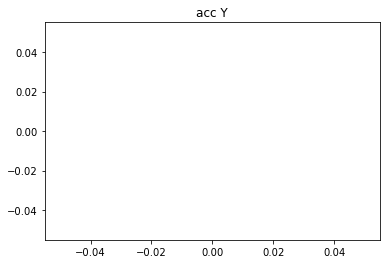

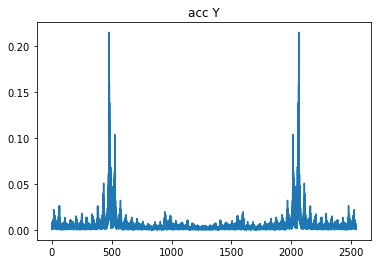

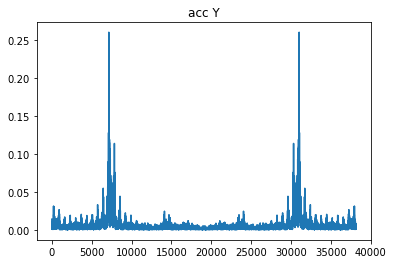

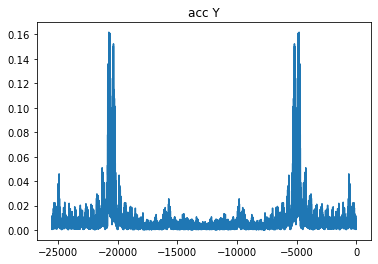

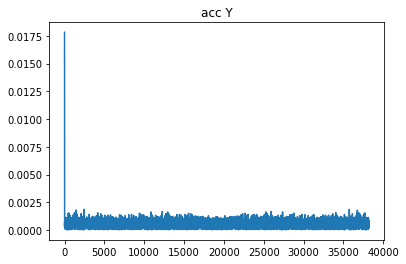

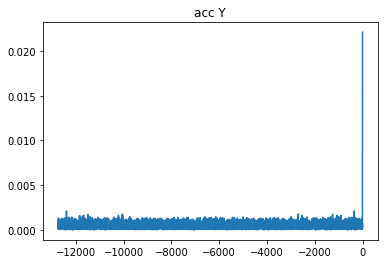

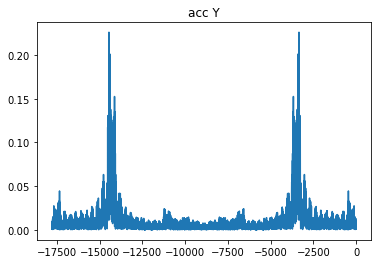

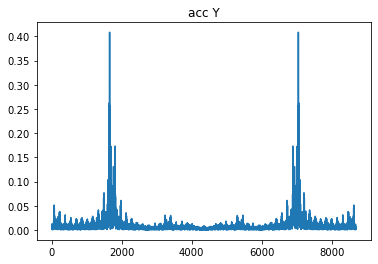

In [13]:
for i in lista_arquivos:
    arquivo = pd.read_csv(path+i, header=None, names = ["acc X","acc Y", "acc Z", "Temperatura"])
    T = arquivo["acc Y"].iloc[0]/arquivo["acc Y"].iloc[1]
    N = len(arquivo["acc Y"])
    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = arquivo["acc Y"]
    yf = np.fft.fft(y)
    plt.title("acc Y")
    plt.plot(x, 2.0/N * np.abs(yf))
    plt.show()
    

b) Harmônicos

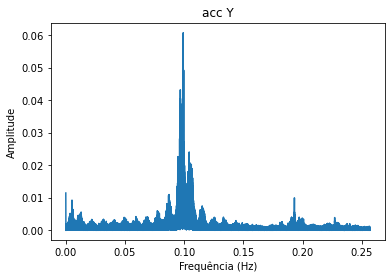

In [9]:
T = dados["acc Y"].iloc[0]/dados["acc Y"].iloc[1]
N = len(dados["acc Y"])
x = np.linspace(0.0, N*T, N, endpoint=False)
y = dados["acc Y"]
yf = np.fft.fft(y)
xf = np.fft.fftfreq(N, T)[:N//2]
medias = np.mean(dados["acc Y"])
plt.title("acc Y")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

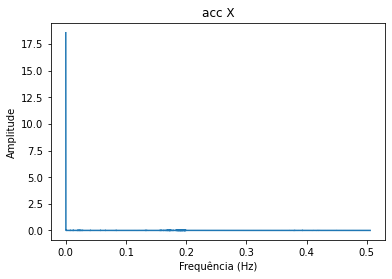

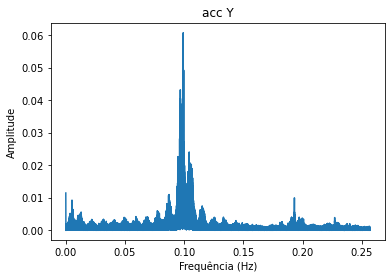

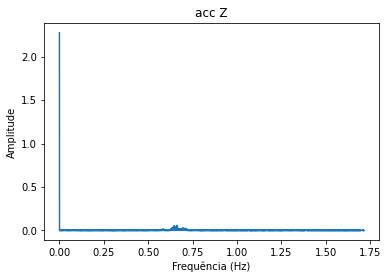

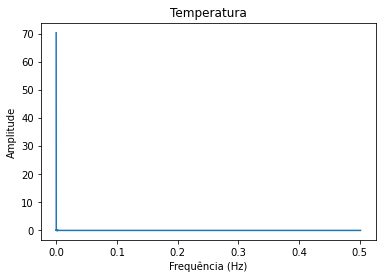

In [14]:
for col in dados.columns:
    T = dados[col].iloc[0]/dados[col].iloc[1]
    N = len(dados[col])
    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = dados[col]
    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(N, T)[:N//2]
    
    plt.title(col)
    plt.ylabel("Amplitude")
    plt.xlabel("Frequência (Hz)")
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.show()

Ponto 2) Fazer um Algoritmo que calcula automaticamente:

a) Quanto tempo o equipamento ficou ligado (UPTIME)

b) Quanto tempo o equipamento ficou desligado (DOWNTIME)

In [11]:
ligado = 0
desligado = 0
for i in range(1,len(dados["Temperatura"])):
    flag_temperatura = (dados["Temperatura"].iloc[i] <= dados["Temperatura"].iloc[i-1])
    flag_aceleracaoX = (dados["acc X"].iloc[i] == 0)
    flag_aceleracaoY = dados["acc Y"].iloc[i] == 0
    flag_aceleracaoZ = (dados["acc Z"].iloc[i] == 0)
    if(flag_temperatura and (flag_aceleracaoX or flag_aceleracaoY or flag_aceleracaoZ)):
        desligado += 1
    else:
        ligado += 1
print("Ligado",ligado)
print("Desligado",desligado)

Ligado 242254
Desligado 12850


Ponto 3) Fazer sua análise sobre a condição do equipamento:

        a) Está desbalanceado?
                R - Segundo o material de base, sim. Pois todo equipamento rotativo apresenta algum grau de desbalanceamento, por menor que seja. Além disso, o ápice presente na figura de frequência considerando a aceleração Y indica um desbalanceamento segundo (https://tractian.com/blog/guia-das-vibracoes-e-analise-espectral-desbalanceamento).

        b) Desalinhado?
                R - Sim. Devido a inconstância da frequência nas acelerações (em especial a do aceleração Y), podemos ver diversas vibrações na máquina, além disso podemos ver no gáfico de médias diversos pontos onde a temperatura está bastante elevada, o que segundo (https://tractian.com/blog/desalinhamento-de-eixos-e-os-perigos-para-seu-equipamento) é um dos sintomas de desalinhamento.

        c) Que condição se encontra?
                R - O equipamento se encontra desalinhado e desbalanceado.

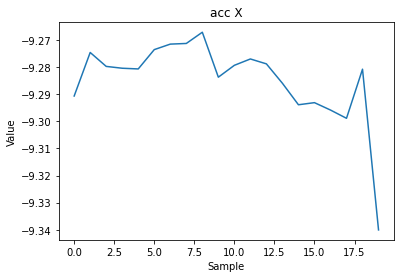

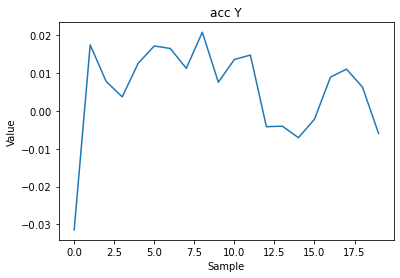

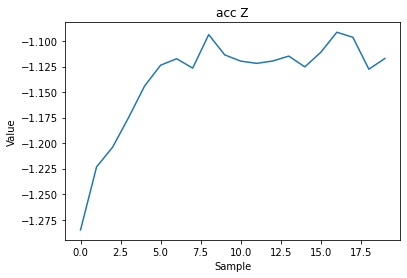

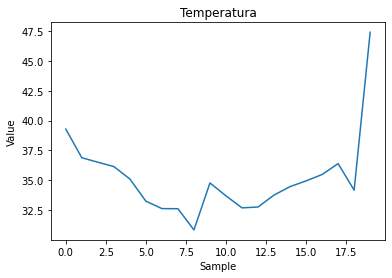

In [12]:
medias = [[] for i in range(len(dados.columns))]
for i in range(len(dados.columns)):
    for j in lista_arquivos:
        arquivo = pd.read_csv(path+j, header=None, names = ["acc X","acc Y", "acc Z", "Temperatura"])
        medias[i].append(np.mean(arquivo[arquivo.columns[i]]))
    plt.title(dados.columns[i])
    plt.ylabel("Value")
    plt.xlabel("Sample")
    plt.plot(medias[i])
    plt.show()